In [1]:
import tensorflow as tf

tf.__version__

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.9.0'

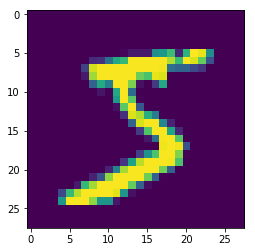

In [11]:
mnist = tf.keras.datasets.mnist #28x28 images of hand written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()

import matplotlib.pyplot as plt 

plt.imshow(x_train[0])#, cmap = plt.cm.binary)
plt.show()

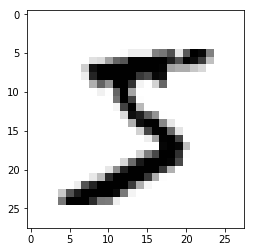

In [12]:
mnist = tf.keras.datasets.mnist #28x28 images of hand written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()

import matplotlib.pyplot as plt 

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()


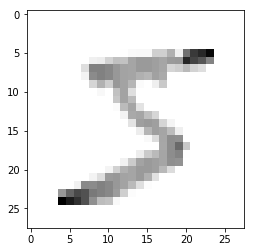

In [13]:
mnist = tf.keras.datasets.mnist #28x28 images of hand written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1) 

import matplotlib.pyplot as plt 

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()


Epoch 1/3
60000/60000 [==============================] - 15s 243us/step - loss: 0.2541 - acc: 0.9251
Epoch 2/3
60000/60000 [==============================] - 12s 199us/step - loss: 0.1058 - acc: 0.9666
Epoch 3/3
60000/60000 [==============================] - 12s 198us/step - loss: 0.0722 - acc: 0.9776


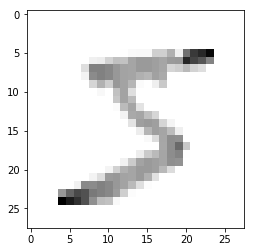

In [15]:
mnist = tf.keras.datasets.mnist #28x28 images of hand written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1) 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation  = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation  = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation  = tf.nn.softmax))#using sofmax for a probability distribution 

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)



import matplotlib.pyplot as plt 

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()


In [16]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 96us/step
0.1086853928972967 0.9672


In [17]:
model.save('super_number_reader_model')

In [18]:
new_model = tf.keras.models.load_model('super_number_reader_model')

ValueError: You are trying to load a weight file containing 3 layers into a model with 0 layers.

In [19]:
predictions = model.predict([x_test])
print(predictions)

[[1.9150676e-08 1.1957411e-07 6.8241920e-05 ... 9.9991953e-01
  1.0442969e-08 4.2971394e-07]
 [1.3245119e-07 1.7197316e-03 9.9827886e-01 ... 9.6977357e-11
  4.4298516e-09 4.3350115e-11]
 [2.1328317e-07 9.9976844e-01 8.9979105e-05 ... 5.5287481e-05
  5.9869366e-05 2.3217194e-06]
 ...
 [7.3756951e-08 2.4808376e-06 6.0888760e-06 ... 1.2795981e-04
  3.6364981e-05 3.0512342e-03]
 [1.4276068e-04 3.0535014e-07 8.3607279e-07 ... 1.5027224e-06
  3.4399829e-03 4.4133824e-08]
 [2.3674961e-06 8.1182607e-09 2.2881590e-08 ... 5.6282742e-11
  1.4030729e-09 7.8464870e-09]]


In [20]:
import numpy as np

print(np.argmax(predictions[0]))

7


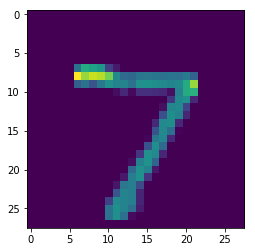

In [21]:
plt.imshow(x_test[0])
plt.show()